In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl

In [72]:
df = pd.read_csv('table6- Estimated refugee stock.csv', index_col=[0], skiprows=14)
df4 = pd.read_csv('country_reference.csv')

In [50]:
df.columns = ['Major area, region, country or area of destination', 'Notes',
       'Country code', 'Type of data (a)',
       'Estimated refugee stock at mid-year (both sexes)1990', 'Estimated refugee stock at mid-year (both sexes)1995',
       'Estimated refugee stock at mid-year (both sexes)2000', 'Estimated refugee stock at mid-year (both sexes)2005', 
       'Estimated refugee stock at mid-year (both sexes)2010', 'Estimated refugee stock at mid-year (both sexes)2015',
       'Refugees as a percentage of the international migrant stock 1990', 'Refugees as a percentage of the international migrant stock 1995',
       'Refugees as a percentage of the international migrant stock 2000', 'Refugees as a percentage of the international migrant stock 2005', 'Refugees as a percentage of the international migrant stock 2010', 'Refugees as a percentage of the international migrant stock 2015',
       'Annual rate of change of the refugee stock 1990-1995', 'Annual rate of change of the refugee stock 1995-2000',
       'Annual rate of change of the refugee stock 2000-2005', 'Annual rate of change of the refugee stock 2005-2010','Annual rate of change of the refugee stock 2010-2015',
       'Unnamed: 23', 'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26','Unnamed: 22',
       'Unnamed: 27', 'Unnamed: 28', 'Unnamed: 29', 'Unnamed: 30',
       'Unnamed: 31']

df = df.drop(columns=['Major area, region, country or area of destination', 'Notes','Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27', 'Unnamed: 22',
       'Unnamed: 28', 'Unnamed: 29', 'Unnamed: 30', 'Unnamed: 31',
       ])

df = df.dropna(subset = ['Type of data (a)']).drop(columns=['Type of data (a)'])

In [51]:
df1 = df.iloc[:,0:6]
df2 = df[['Country code','Refugees as a percentage of the international migrant stock 1990', 'Refugees as a percentage of the international migrant stock 1995',
       'Refugees as a percentage of the international migrant stock 2000', 'Refugees as a percentage of the international migrant stock 2005', 'Refugees as a percentage of the international migrant stock 2010', 'Refugees as a percentage of the international migrant stock 2015']]
df3 = df[['Country code','Annual rate of change of the refugee stock 1990-1995', 'Annual rate of change of the refugee stock 1995-2000',
       'Annual rate of change of the refugee stock 2000-2005', 'Annual rate of change of the refugee stock 2005-2010','Annual rate of change of the refugee stock 2010-2015']]

In [52]:
df1 = df1.melt (
    id_vars=['Country code'], 
    var_name=['year'], 
    value_name='Amount'
    )

df1 = df1.assign (
    Year = lambda x: x.year.str[-4:]).drop(columns =['year'], axis=0)

In [53]:
df1

,Country code,Amount,Year
0,108.0,267 929,1990
1,174.0,0,1990
2,262.0,54 508,1990
3,232.0,0,1990
4,231.0,741 965,1990
...,...,...,...
1155,882.0,0,2010
1156,772.0,0,2010
1157,776.0,0,2010
1158,798.0,0,2010


In [54]:
df2 = df2.melt (
    id_vars=['Country code'], 
    var_name=['year'], 
    value_name='Refugees as a percentage of the international migrant stock'
    )

df2 = df2.assign (
    Year = lambda x: x.year.str[-4:]).drop(columns =['year'], axis=0)

In [55]:
df2

,Country code,Refugees as a percentage of the international migrant stock,Year
0,108.0,80.4,1990
1,174.0,0.0,1990
2,262.0,44.6,1990
3,232.0,0.0,1990
4,231.0,64.2,1990
...,...,...,...
1387,882.0,0.0,2015
1388,772.0,0.0,2015
1389,776.0,0.0,2015
1390,798.0,0.0,2015


In [56]:
df3 = df3.melt (
    id_vars=['Country code'], 
    var_name=['year'], 
    value_name='Refugees as a percentage of the international migrant stock'
    )

df3 = df3.assign (
    Year = lambda x: x.year.str[-4:]).drop(columns =['year'], axis=0)

In [57]:
df3

,Country code,Refugees as a percentage of the international migrant stock,Year
0,108.0,-3.39,1995
1,174.0,..,1995
2,262.0,-9.76,1995
3,232.0,..,1995
4,231.0,-5.51,1995
...,...,...,...
1155,882.0,..,2015
1156,772.0,..,2015
1157,776.0,..,2015
1158,798.0,..,2015


In [69]:
df1['Amount'] = df1['Amount'].str.strip()
df1['Amount'] = df1['Amount'].str.replace(" ","")
df1['Amount'] = df1['Amount'].fillna(0)
df1['Amount'] = pd.to_numeric(df1['Amount'], errors='coerce')

<AxesSubplot:xlabel='Year', ylabel='Amount'>

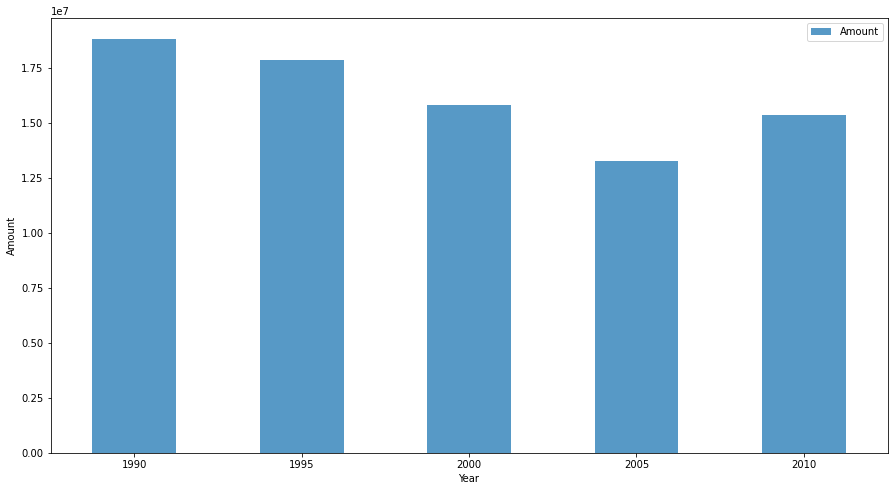

In [70]:
# graphic1, refugee stocks, gender

test1 = pd.DataFrame(df1.groupby(['Year']).sum(), columns = ['Amount'])
test1.plot(kind='bar', figsize=(15,8), alpha=0.75, rot=0, ylabel='Amount')

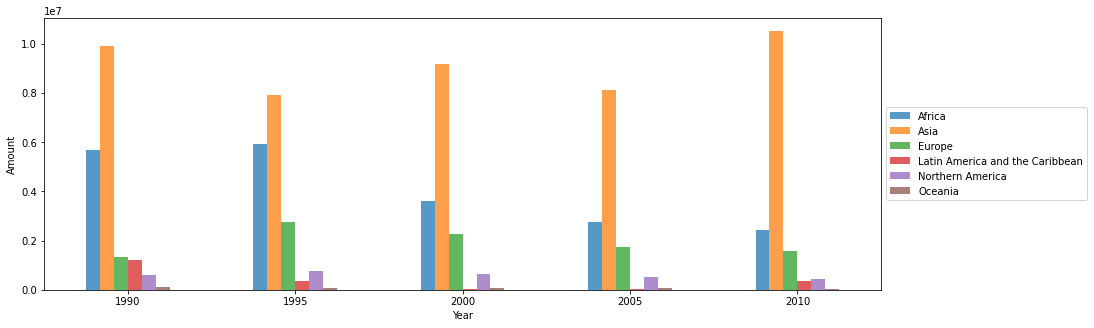

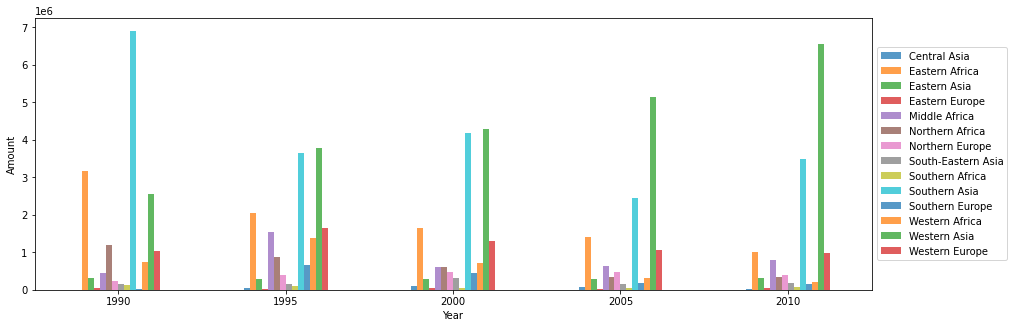

In [73]:
# graphic2, refugee stocks, region

df4_reference = df4[['Country code','Major area' , 'Region', 'Developed region', 'Least developed country']]
df3_4 = pd.merge(df1,df4_reference,on=['Country code'],how='left')
test8 = df3_4.groupby(['Year', 'Major area']).sum().drop(columns=['Country code'])
graphic_8 = pd.pivot_table(test8, index='Year', columns='Major area', values='Amount')
graphic_8.plot(kind='bar', figsize=(15,5), alpha=0.75, rot=0, ylabel='Amount').legend(loc='center left',bbox_to_anchor=(1.0, 0.5))

#highest 3: Asia, Africa, Europe, dive into these 3 areas region
test8 = df3_4.loc[(df3_4['Major area'] == 'Asia') | (df3_4['Major area'] == 'Africa')  
                   | (df3_4['Major area'] == 'Europe')].groupby(['Year', 'Region']).sum().drop(columns=['Country code'])
graphic_8 = pd.pivot_table(test8, index='Year', columns='Region', values='Amount')


graphic_8.plot(kind='bar', figsize=(15, 5), alpha=0.75, rot=0, ylabel='Amount').legend(loc='center left',bbox_to_anchor=(1.0, 0.5))